<a href="https://colab.research.google.com/github/rashmi0852/Airline_Passenger_Refferal_Prediction/blob/main/Airline_Referal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Airline Passenger Refferal Prediction



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Name **       - Rashmiranjan Nayak


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/rashmi0852/Airline_Passenger_Refferal_Prediction.git


# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [705]:
# Import Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [706]:
# Load Dataset
airline_df=pd.read_excel("/content/data_airline_reviews.xlsx")

### Dataset First View

In [707]:
# Dataset First 5 rows look
airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [708]:
#Dataset Last 5 rows look
airline_df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


### Dataset Rows & Columns count

In [709]:
# Dataset Rows & Columns count

# Count the rows and columns in the airline dataset
num_rows, num_cols = airline_df.shape

print("Total rows in dataset=",num_rows)

print("Total columns in dataset=",num_cols)


Total rows in dataset= 131895
Total columns in dataset= 17


### Dataset Information

In [710]:
# Dataset Info
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [711]:
#keep original copy safe
airline_data=airline_df.copy()

In [712]:
# Dataset Duplicate Value Count

duplicate_values=airline_data.duplicated().sum()
print("Duplicate rows in dataset:",duplicate_values)

Duplicate rows in dataset: 70711


In [713]:
#Drop duplicate records
airline_data.drop_duplicates(inplace=True)

In [714]:
# Dataset Rows & Columns count

# Count the rows and columns in the airline dataset
num_rows, num_cols = airline_data.shape

print("Total rows in dataset=",num_rows)


Total rows in dataset= 61184


#### Missing Values/Null Values

In [715]:
# Missing Values/Null Values Count
print (f"Missing Values in each column"+"\n" + "--"*15)
print(airline_data.isnull().sum())

Missing Values in each column
------------------------------
airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64


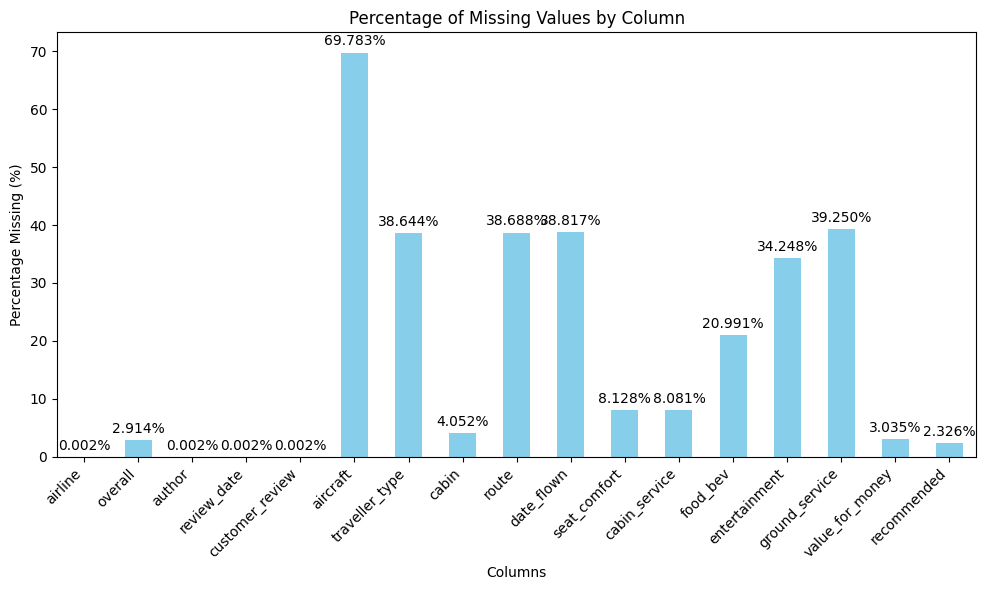

In [716]:
# Visualizing the missing values

#Calculate missing persentage for each column
missing_percent =round( (airline_data.isnull().mean())*100,3)


#Bar plot
plt.figure(figsize=(10, 6))
bars=missing_percent.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.xticks(rotation=45,ha="right")

# Add data labels to the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{height:.3f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


### What did you know about your dataset?

By exploring Airline Review dataset following insights were found:-
* The dataset contains a total of 131,895 records with 17 features.

* There are 70,711 duplicate records present in the dataset.
* Each column contains some missing values (NaN). The Aircraft column contains the highest amount of missing values, with approximately 70% of the data missing. In contrast, the airline, author, review_date, and customer_review columns contain the least amount of missing data (approximately 0.002%), which is nearly equal to zero.

* There are 7 columns with numeric data types (float64), which likely represent ratings or scores for different aspects of the airline experience.

* The remaining 10 columns have the object data type, which can include categorical variables and textual data.

* Out of the object columns, the review_date & date_flown feature originally represents a Date data type but is in the form of a categorical type.

After removing **70711** dulpicates ,records reduced to **61184** & features remains same as **17**.

## ***2. Understanding Your Variables***

In [717]:
# Dataset Columns
print(airline_data.columns)


Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')


In [718]:
# # Dataset Describe For Numerical Features
airline_data.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,59401.000000,56211.000000,56240.000000,48341.000000,40230.000000,37169.000000,59327.000000
mean,5.164863,2.959278,3.200231,2.926956,2.887994,2.681347,2.950849
std,3.483701,1.436467,1.568429,1.483122,1.504452,1.613995,1.588433
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [719]:
# Dataset Describe For categorical Features
airline_data.describe(exclude="float")

,airline,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,recommended
count,61183,61183,61183,61183,18488,37540,58705,37513,37434,59761
unique,81,44069,3015,61172,2088,4,4,24549,63,2
top,Spirit Airlines,Anders Pedersen,19th January 2015,I flew from Chicago O'Hare to Dublin and from ...,A320,Solo Leisure,Economy Class,BKK to LHR,August 2015,no
freq,2871,93,198,2,2130,13935,45171,31,1127,31268


### Variables Description

* **airline**: Name of the airline.

* **overall**:  Overall rating (1 - 10).

* **author**: Author of the trip

* **review date**: Date of the Review

* **customer review**: Review of the customers in free text format

* **aircraft**: Type of the aircraft

* **traveller type**: Type of traveler (e.g. business, leisure)

* **cabin**: Cabin at the flight(e.g Economy,business)
* **route**: The flight route

* **date flown**: The date the flight was taken

* **seat comfort**: Rating for seat comfort (1-5)

* **cabin service**: Rating for cabin service (1-5)

* **foodbev**: Rating for food and beverage (1-5)

* **entertainment**: Rating for entertainment (1-5)

* **groundservice**: Rating for ground service (1-5)

* **valueformoney**: Rating for value for money (1-5)
* **recommended**:  Whether the customer recommends the airline (categorical, possibly binary).




### Check Unique Values for each variable.

In [720]:
# List of categorical columns
categorical_columns = ['airline', 'author', 'review_date', 'aircraft', 'traveller_type',
                       'cabin', 'route', 'date_flown', 'recommended']
for column in categorical_columns:

  # Select the "airline" column
  airline_column = airline_data[column]

  # Get value counts
  value_counts = airline_column.value_counts()

  # Get the number of unique values
  nunique = airline_column.nunique()

  # Print the results
  print("--"*50)
  print("Column Name:",column)
  print("\nNumber of Unique Values:",nunique)
  print("\nValue Counts:")
  print(value_counts)
  print("--"*50)
  print("\n")


----------------------------------------------------------------------------------------------------
Column Name: airline

Number of Unique Values: 81

Value Counts:
Spirit Airlines       2871
American Airlines     2846
United Airlines       2774
British Airways       2731
Emirates              1763
                      ... 
QantasLink             104
Adria Airways           85
Air Arabia              80
Tunisair                71
Thai Smile Airways      48
Name: airline, Length: 81, dtype: int64
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
Column Name: author

Number of Unique Values: 44069

Value Counts:
Anders Pedersen    93
Michel Perrin      89
Jonathan Rodden    81
T Eldem            56
John Curtain       52
                   ..
A Robbins           1
P Devans            1
T Dayes             1
M Cohn              1
Kasper

## 3. ***Data Wrangling***

### Data Wrangling Code

#### Handeling Missing values

In [721]:
#print Missing persentage
print(missing_percent)


airline             0.002
overall             2.914
author              0.002
review_date         0.002
customer_review     0.002
aircraft           69.783
traveller_type     38.644
cabin               4.052
route              38.688
date_flown         38.817
seat_comfort        8.128
cabin_service       8.081
food_bev           20.991
entertainment      34.248
ground_service     39.250
value_for_money     3.035
recommended         2.326
dtype: float64


In [722]:
#Drop missing value records which are less than 5%
airline_data.dropna(subset=["airline","overall","author","review_date","customer_review",
                            "cabin","value_for_money","recommended"],inplace=True)

In [723]:
#Drop aircraft column as 70% if its data are missing
airline_data.drop("aircraft",inplace=True,axis=1)

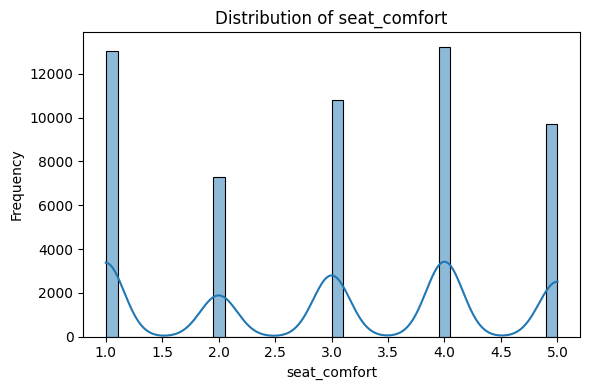

Column: seat_comfort
Median Imputation: 3.00
Mean Imputation: 2.95
Mode Imputation: 1.00


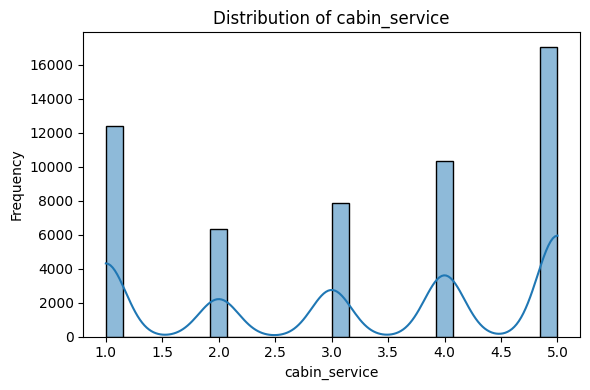

Column: cabin_service
Median Imputation: 3.00
Mean Imputation: 3.19
Mode Imputation: 5.00


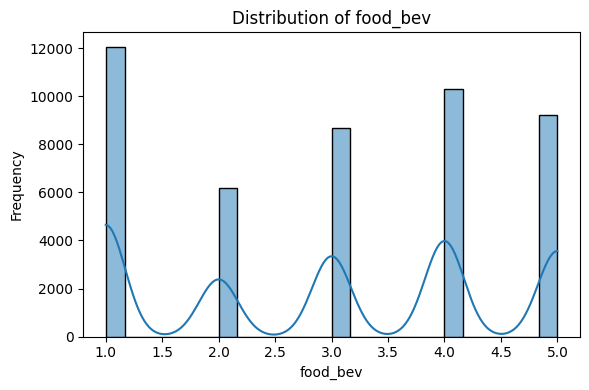

Column: food_bev
Median Imputation: 3.00
Mean Imputation: 2.91
Mode Imputation: 1.00


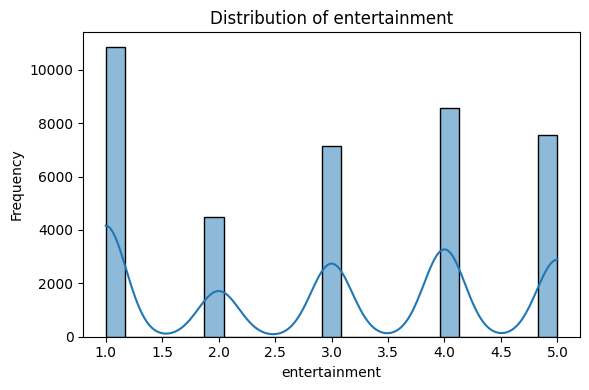

Column: entertainment
Median Imputation: 3.00
Mean Imputation: 2.86
Mode Imputation: 1.00


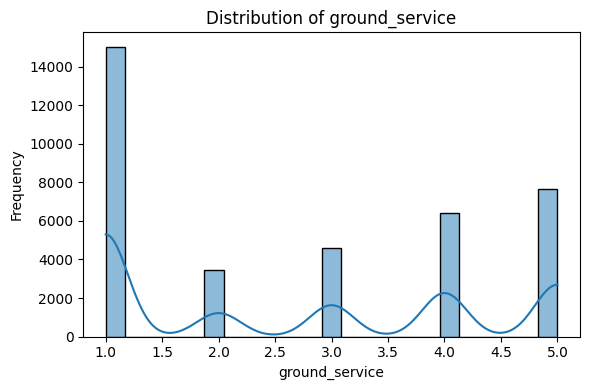

Column: ground_service
Median Imputation: 3.00
Mean Imputation: 2.69
Mode Imputation: 1.00


In [724]:
# List of numerical columns analyze and impute
numeric_missing = ['seat_comfort', 'cabin_service', 'food_bev',
                      'entertainment', 'ground_service']

# Create distribution plots for each column
for column in numeric_missing :
    plt.figure(figsize=(6, 4))
    sns.histplot(data=airline_data, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Calculate statistics for imputation
    median_value = airline_df[column].median()
    mean_value = airline_df[column].mean()
    mode_value = airline_df[column].mode()[0]

    print(f"Column: {column}")
    print(f"Median Imputation: {median_value:.2f}")
    print(f"Mean Imputation: {mean_value:.2f}")
    print(f"Mode Imputation: {mode_value:.2f}")
    print("="*50)


In [725]:
#Handel numerical missing columns
# Create a SimpleImputer with strategy='median' for numerical columns
numeric_imputer = SimpleImputer(strategy='median')


# Apply the imputer to the numeric columns with missing values
airline_data[numeric_missing] = numeric_imputer.fit_transform(airline_data[numeric_missing])


In [726]:
#Handel categorical missing columns
# Create a SimpleImputer with strategy='most_frequent' for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')

# List of categorical columns with missing values
categorical_missing = ['traveller_type', 'route', 'date_flown']

# Apply the imputer to the categorical columns with missing values
airline_data[categorical_missing] = categorical_imputer.fit_transform(airline_data[categorical_missing])


In [727]:
airline_data.isnull().sum()

airline            0
overall            0
author             0
review_date        0
customer_review    0
traveller_type     0
cabin              0
route              0
date_flown         0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64

#### Convert to Date datatype

In [728]:
# Convert "review_date" to date data type
airline_data['review_date'] = pd.to_datetime(airline_data['review_date'], errors='coerce')

# Convert "date_flown" to date data type
airline_data['date_flown'] = pd.to_datetime(airline_data['date_flown'], errors='coerce')

In [780]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56933 entries, 1 to 131866
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          56933 non-null  object        
 1   overall          56933 non-null  float64       
 2   author           56933 non-null  object        
 3   review_date      56933 non-null  datetime64[ns]
 4   customer_review  56933 non-null  object        
 5   traveller_type   56933 non-null  object        
 6   cabin            56933 non-null  object        
 7   route            56933 non-null  object        
 8   date_flown       56933 non-null  datetime64[ns]
 9   seat_comfort     56933 non-null  float64       
 10  cabin_service    56933 non-null  float64       
 11  food_bev         56933 non-null  float64       
 12  entertainment    56933 non-null  float64       
 13  ground_service   56933 non-null  float64       
 14  value_for_money  56933 non-null  floa

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [730]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [731]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [732]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [733]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [734]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [735]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [736]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [737]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [738]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [739]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [740]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [741]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [742]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [743]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [744]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [745]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [746]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [747]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [748]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [749]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [750]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [751]:
# Expand Contraction

#### 2. Lower Casing

In [752]:
# Lower Casing

#### 3. Removing Punctuations

In [753]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [754]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [755]:
# Remove Stopwords

In [756]:
# Remove White spaces

#### 6. Rephrase Text

In [757]:
# Rephrase Text

#### 7. Tokenization

In [758]:
# Tokenization

#### 8. Text Normalization

In [759]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [760]:
# POS Taging

#### 10. Text Vectorization

In [761]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [762]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [763]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [764]:
# Transform Your data

### 6. Data Scaling

In [765]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [766]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [767]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [768]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [769]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [770]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [771]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [772]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [773]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [774]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [775]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [776]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [777]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [778]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***